In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


Loading up the customer churn data


In [175]:
df = pd.read_csv('customer_churn.csv')
df.head()
print(df.shape)
print(df.info())


(900, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    int64  
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    int64  
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 70.4+ KB
None


In [176]:
#Cleaning Data
df_clean = df.copy()

In [177]:
#strip white space from the object column
for col in df_clean.select_dtypes(include = ['object']).columns:
    df_clean[col] = df_clean[col].astype(str).str.strip()

df_clean.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42,11066.80,0,7.22,8,8/30/2013 7:00,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41,11916.22,0,6.50,11,8/13/2013 0:38,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38,12884.75,0,6.67,12,6/29/2016 6:20,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42,8010.76,0,6.71,10,4/22/2014 12:43,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37,9191.58,0,5.56,9,1/19/2016 15:31,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [178]:
df.isnull().sum()

Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
dtype: int64

In [179]:
#change total purchaces 
df['Total_Purchase'] = pd.to_numeric(df['Total_Purchase'], errors = 'coerce')
df.isnull().sum()

Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
dtype: int64

In [180]:
df_clean.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42,11066.80,0,7.22,8,8/30/2013 7:00,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41,11916.22,0,6.50,11,8/13/2013 0:38,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38,12884.75,0,6.67,12,6/29/2016 6:20,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42,8010.76,0,6.71,10,4/22/2014 12:43,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37,9191.58,0,5.56,9,1/19/2016 15:31,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


## exploratory data analysis

In [181]:
df.info()
df.describe()
df['Churn'].value_counts(normalize=True) * 100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    int64  
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    int64  
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 70.4+ KB


Churn
0    83.333333
1    16.666667
Name: proportion, dtype: float64

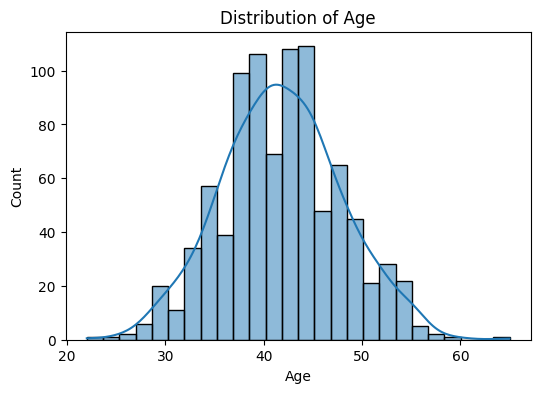

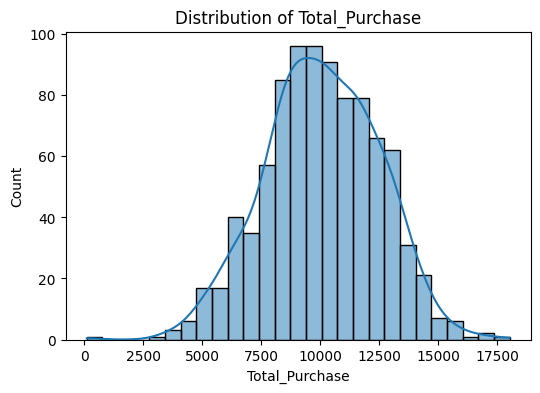

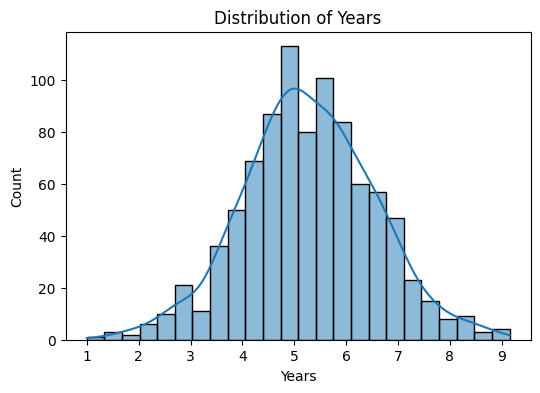

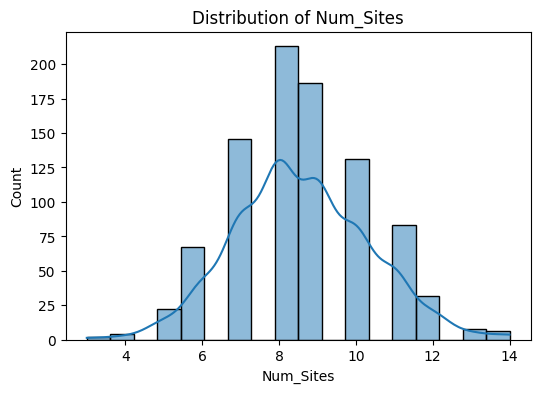

In [182]:
#checking for outliers
num_cols = ['Age', 'Total_Purchase', 'Years', 'Num_Sites']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

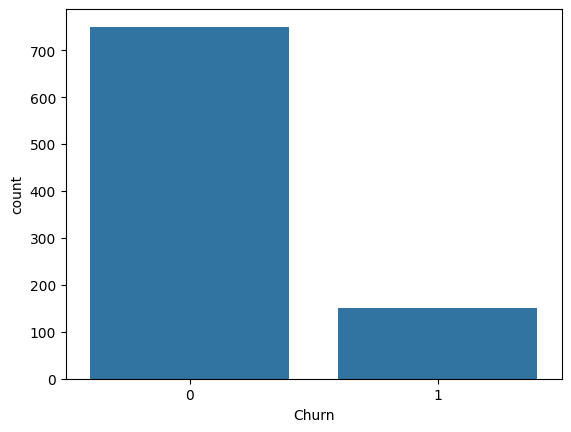

In [183]:
#Churn Distribution
sns.countplot(x = 'Churn', data =df);

In [184]:
# Number of churners are significantly less then the Loyal Customers

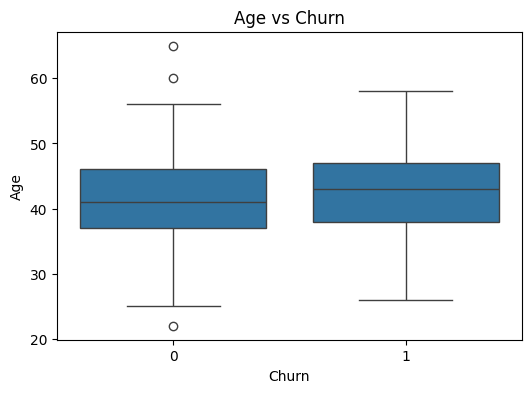

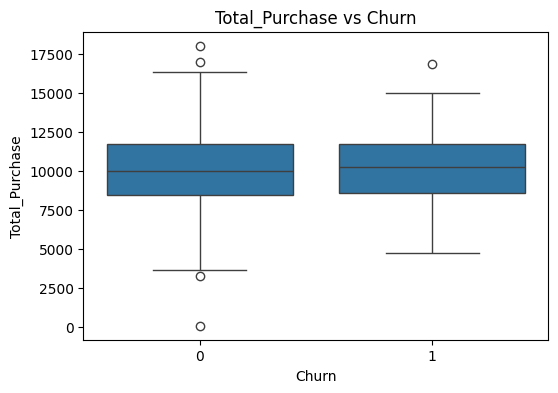

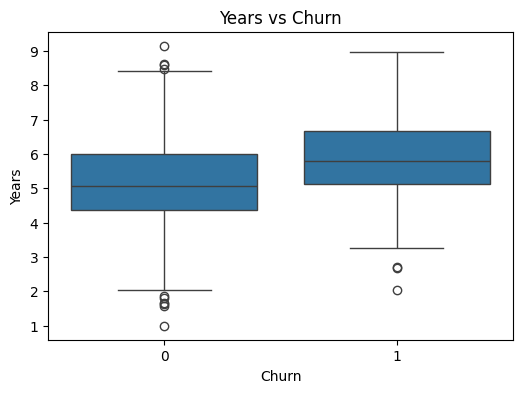

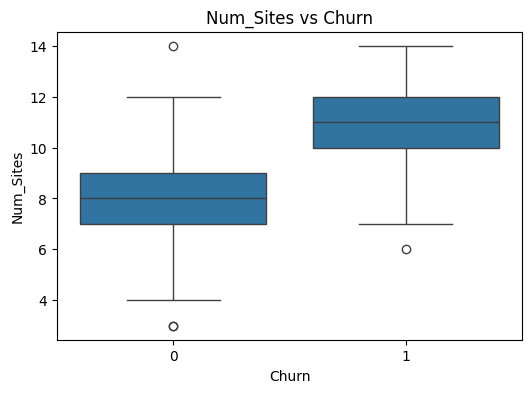

In [185]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn',y=col, data=df)
    plt.title(f'{col} vs Churn')    
    plt.show()

In [186]:
##Most of the churners are Middle aged and adults
##Customers who spend less are slightly more likely to churn 
##Churner are more likely to spend less time of engagement
##Churners are engaged on less number of sites

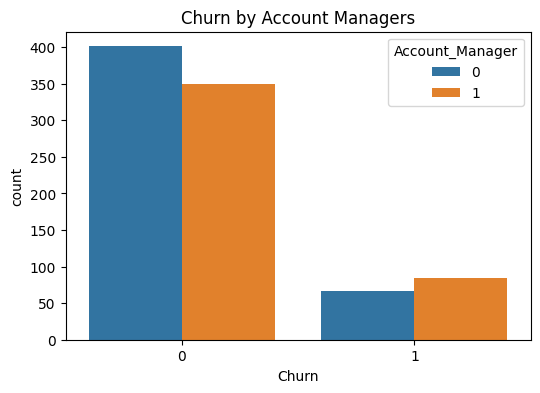

In [187]:
#Churn by Account_Manager
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', hue='Account_Manager', data=df)
plt.title(f'Churn by Account Managers')
plt.show()

In [188]:
#defining age group
def age_category(age):
    if age<25:
        return 'Youth'
    elif age<40:
        return 'Adult'
    elif age<60:
        return 'Middle Aged'
    else:
        return 'Senior'
    
df['Age_group'] = df['Age'].apply(age_category)


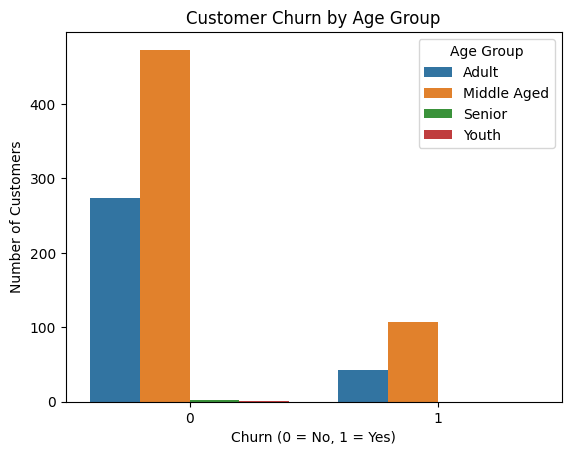

In [189]:
# Analysis of churn accorrding to age group
sns.countplot(x='Churn', hue='Age_group' ,data =df)
plt.title('Customer Churn by Age Group')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.legend(title='Age Group')
plt.show()

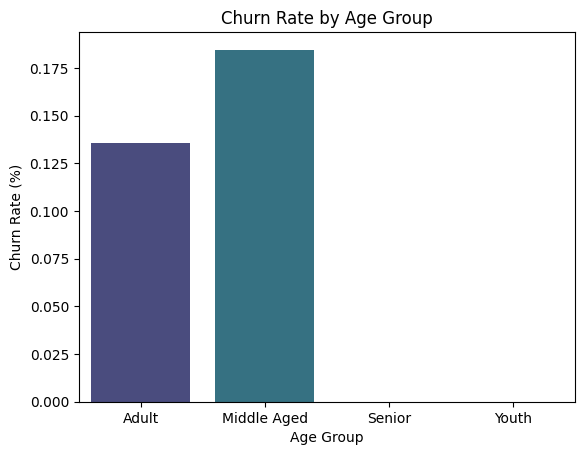

In [190]:
#churn rate per age group
churn_rate = df.groupby('Age_group')['Churn'].mean().reset_index()
sns.barplot(x='Age_group', y ='Churn',data = churn_rate, palette = 'viridis')
plt.title('Churn Rate by Age Group')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Age Group')
plt.show()

In [191]:
df.drop(columns=['Age_group'],inplace = True)
print(df.columns)

Index(['Names', 'Age', 'Total_Purchase', 'Account_Manager', 'Years',
       'Num_Sites', 'Onboard_date', 'Location', 'Company', 'Churn'],
      dtype='object')


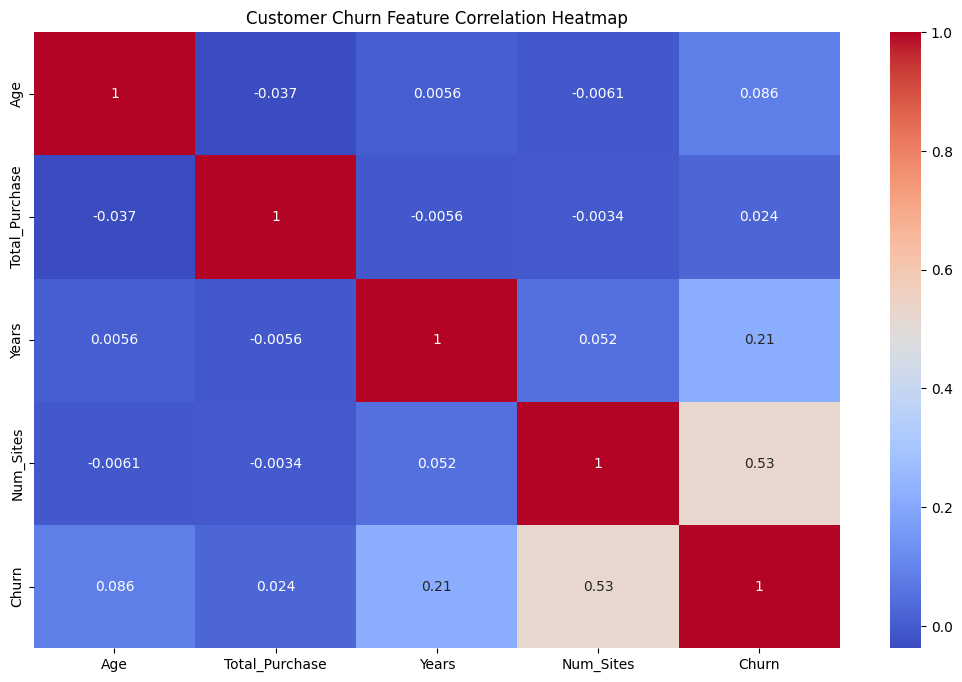

In [192]:
#Customer Churn Feature Correlation
plt.figure(figsize = (13,8))
corr = df[['Age', 'Total_Purchase', 'Years', 'Num_Sites', 'Churn']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Customer Churn Feature Correlation Heatmap')
plt.show()



Feature engineering to visualize with PowerBI

In [193]:
#Extracting state from the Location
def extract_state(address):
    try:
        return address.split(",")[1].strip().split()[0]
    except:
        return None

df['State'] = df['Location'].apply(extract_state)

In [194]:
##Extracting City from the Location
def extract_city(address):
    try:
        return address.split(",")[0].split()[-1]
    except:
        return None

df['City'] = df['Location'].apply(extract_city)


In [195]:
df[['Location', 'City', 'State']].head(10)

,Location,City,State
0,"10265 Elizabeth Mission Barkerburgh, AK 89518",Barkerburgh,AK
1,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Carloshaven,RI
2,"1331 Keith Court Alyssahaven, DE 90114",Alyssahaven,DE
3,"13120 Daniel Mount Angelabury, WY 30645-4695",Angelabury,WY
4,"765 Tricia Row Karenshire, MH 71730",Karenshire,MH
5,"6187 Olson Mountains East Vincentborough, PR 7...",Vincentborough,PR
6,"4846 Savannah Road West Justin, IA 87713-3460",Justin,IA
7,"25271 Roy Expressway Suite 147 Brownport, FM 5...",Brownport,FM
8,"3725 Caroline Stravenue South Christineview, M...",Christineview,MA
9,"363 Sandra Lodge Suite 144 South Ann, WI 51655...",Ann,WI


In [196]:
#Converting years into Tenure Group
df['Tenure'] = pd.cut(df['Years'],
                      bins=[0,1,3,5,10,100],
                      labels=['<1year','1-3years','3-5years','5-10years','10+yaers'],
                      right=False)

In [197]:
#Converting age to Age Group
df['Agegroup']= pd.cut(df['Age'],
                       bins=[0,25,35,45,55,65,100],
                       labels=['<25','25-35','35-45','45-55','55-65','65+'],
                       right=False)

In [198]:
#Calculating spend per year
df['Spendperyear'] = df['Total_Purchase']/df['Years']
df['Spendperyear'].replace([np.inf,-np.inf],0,inplace = True)
df['Spendperyear'].fillna(0,inplace=True)
df['Spendperyear']=df['Spendperyear'].round(2)


In [199]:
#Calculating site per year
df['Siteperyear'] = df['Num_Sites']/df['Years']
df['Siteperyear'].replace([np.inf,-np.inf],0,inplace = True)
df['Siteperyear'].fillna(0,inplace=True)
df['Siteperyear']= df['Siteperyear'].round(1)

In [200]:
#Account manager Flag
df['HasAccountManager'] = df['Account_Manager'].apply(lambda x: 'Yes' if x==1 else 'No')  

In [201]:
#Calculating Onboard Year
df['Onboard_date'] = pd.to_datetime(df['Onboard_date'])
df['Onboard_year'] = df['Onboard_date'].dt.year
df['Onboard_year']

0      2013
1      2013
2      2016
3      2014
4      2016
       ... 
895    2007
896    2008
897    2014
898    2012
899    2010
Name: Onboard_year, Length: 900, dtype: int32

In [202]:
#onborad Quarter
df['OnboardQuarter'] = df['Onboard_date'].dt.quarter


In [203]:
#Company Risk Score
Company_churn_rate = df.groupby('Company')['Churn'].mean()
df['CompanyRisk'] = df['Company'].map(Company_churn_rate)
df['CompanyRisk'] = df['CompanyRisk'].round(2)

In [204]:
#Engagement Score
df['EngagementScore'] = df['Num_Sites']*df['Years']

In [205]:
#Loyal Spending
df['LoyaltyScore'] = df['Total_Purchase'] / (df['Years']+1)
df['LoyaltyScore'] = df['LoyaltyScore'].round(2)

In [206]:
df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn,State,City,Tenure,Agegroup,Spendperyear,Siteperyear,HasAccountManager,Onboard_year,OnboardQuarter,CompanyRisk,EngagementScore,LoyaltyScore
0,Cameron Williams,42,11066.80,0,7.22,8,2013-08-30 07:00:00,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1,AK,Barkerburgh,5-10years,35-45,1532.80,1.1,No,2013,3,1.00,57.76,1346.33
1,Kevin Mueller,41,11916.22,0,6.50,11,2013-08-13 00:38:00,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1,RI,Carloshaven,5-10years,35-45,1833.26,1.7,No,2013,3,0.33,71.50,1588.83
2,Eric Lozano,38,12884.75,0,6.67,12,2016-06-29 06:20:00,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1,DE,Alyssahaven,5-10years,35-45,1931.75,1.8,No,2016,2,1.00,80.04,1679.89
3,Phillip White,42,8010.76,0,6.71,10,2014-04-22 12:43:00,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1,WY,Angelabury,5-10years,35-45,1193.85,1.5,No,2014,2,1.00,67.10,1039.01
4,Cynthia Norton,37,9191.58,0,5.56,9,2016-01-19 15:31:00,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1,MH,Karenshire,5-10years,35-45,1653.16,1.6,No,2016,1,1.00,50.04,1401.16


In [207]:
df.to_csv("churn_feature_engineered.csv",index=False)